In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
# 다항회귀분석
[Step 1~5] 데이터 준비
'''

# csv 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'] = df['horsepower'].replace('?', np.nan) # ? -> nan으로 변경
df['horsepower'] = df['horsepower'].astype('float')

# 결측치 대체
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf=df[['mpg', 'cylinders', 'horsepower', 'weight']]

# train data와 test data로 구분(7:3 비율)
x=ndf[['weight']] # 독립변수 x
y=ndf['mpg'] # 종속변수 y

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, # 독립 변수
                                                   y, # 종속 변수
                                                   test_size=0.3, # 검증 30%
                                                   random_state=10) # 랜덤 추출 값

print('훈련데이터: ', x_train.shape)
print('검증데이터: ', x_test.shape)

훈련데이터:  (278, 1)
검증데이터:  (120, 1)


In [4]:
'''
[Step 6] 다항회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2) # 2차항 적용
x_train_poly=poly.fit_transform(x_train) # x_train 데이터를 2차항으로 변형

print('원본 데이터: ', x_train.shape)
print('2차항 변환 데이터: ', x_train_poly.shape)

원본 데이터:  (278, 1)
2차항 변환 데이터:  (278, 3)


In [8]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(x_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R 제곱) 계산
x_test_poly = poly.fit_transform(x_test) # x_test 데이터를 2차항으로 변형
r_square = pr.score(x_test_poly, y_test)
print('R^2 결정계수: ', r_square)

R^2 결정계수:  0.72554701541758


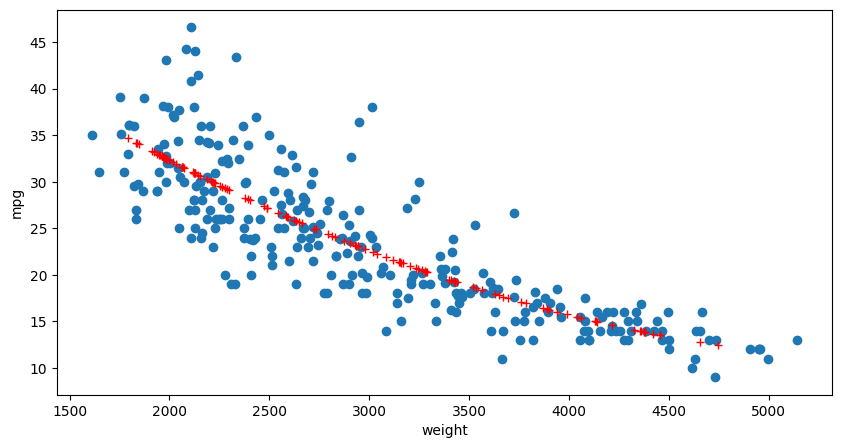

In [10]:
# train data의 산점도 와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test=pr.predict(x_test_poly)

fig, axes=plt.subplots(figsize=(10,5))
axes.plot(x_train, y_train, 'o', label='Train Data') # 데이터 분포
axes.plot(x_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

In [12]:
# 모델에 test data 데이터를 입력하여 예측한 값 y_hat_test를 실제 값 y_test와 비교
x_poly = poly.fit_transform(x_test)

# 오차 계산
test_preds=pd.DataFrame(y_test)
test_preds.columns = ['y_test']
test_preds['y_hat']=y_hat_test
test_preds['squared_error']=(test_preds['y_hat']-test_preds['y_test'])**2

# 평균 제곱 오차
mse = test_preds['squared_error'].mean()
print('mse: ', mse)

mse:  15.813520500520466


In [13]:
# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_hat_test)
print('mae: ', mae)

mae:  3.1405650734460653


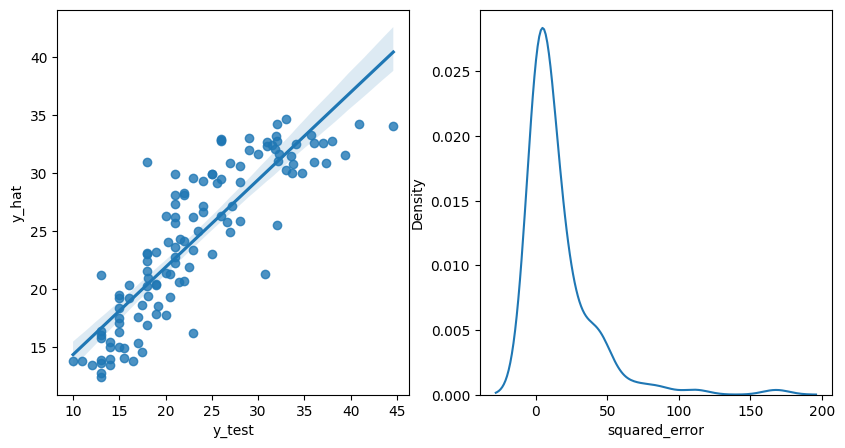

In [14]:
# 오차 분석
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.regplot(x='y_test', y='y_hat', data=test_preds, ax=axes[0]);
sns.kdeplot(x='squared_error', data=test_preds, ax=axes[1]);